#Matplotlib and Pandas for Climate Change data analysis and visualization

In [6]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load data from Nasa
## Global surface temperature
http://climate.nasa.gov/vital-signs/global-temperature/ 

In [3]:
data_temp = pd.read_csv('http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.txt', skiprows=5, 
                       delim_whitespace=True, nrows=135, header=0, names=['annual_mean', 
                       'mean_5_years'],na_values=['*'], index_col=0)

In [4]:
# data_temp.head(6)
data_temp['id']=range(len(data_temp.annual_mean)) # id columns

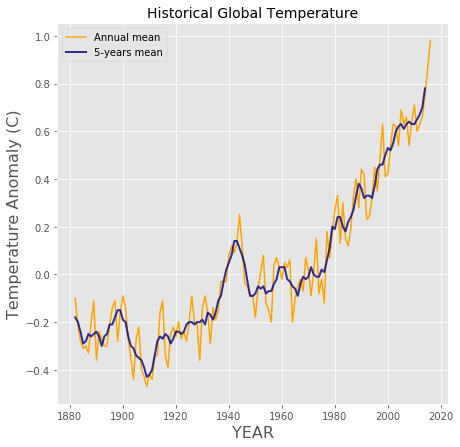

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_temp.annual_mean,color='orange', label='Annual mean');
ax.plot(data_temp.mean_5_years, color='Navy', label='5-years mean', linewidth=2, alpha=0.8);
ax.set_title('Historical Global Temperature', fontsize=14);
ax.set_xlabel('YEAR', fontsize=16);
ax.set_ylabel('Temperature Anomaly (C)', fontsize=16);
ax.legend();

## Plot annual mean and 5-year mean global temperature

### Find Recent and historical "El Niños"
http://www.pmel.noaa.gov/tao/elnino/el-nino-story.html#recent

search dates in dataframe

In [76]:
data_temp.loc[1997:1998] # to locate "El nino" event

,annual_mean,mean_5_years,id
1997,0.48,0.46,115
1998,0.63,0.46,116


## Global atmosphere CO2 content 
http://climate.nasa.gov/vital-signs/carbon-dioxide/ 

In [9]:
data_co2_year = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['mean', 'unc'],index_col=0)

In [10]:
data_co2_monthly = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['month', 'date', 
                       'average', 'interpolated', 'trend', 'days'], na_values=['-99.99'],index_col=0)

## Atmospheric Global CO2 content trend per year 

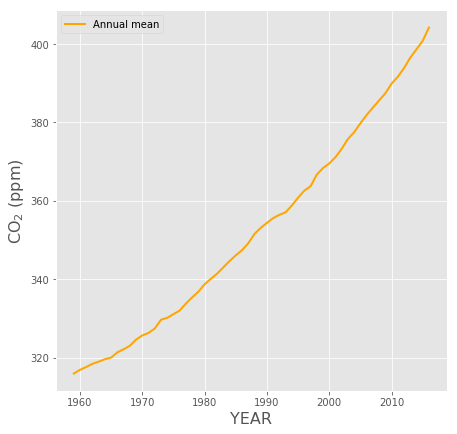

In [28]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_co2_year['mean'], color='orange', label='Annual mean', linewidth=2);
ax.legend(loc='best');
ax.set_xlabel('YEAR', fontsize=16);
ax.set_ylabel('CO$_{2}$ (ppm)', fontsize=16);

## Global Sea level

In [29]:
sea_level = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt',
                       delim_whitespace=True, skiprows=46, usecols=(2, 11), header=None, names=['yeardec', 'level'])

In [30]:
# split decimal year for getting only the year

year = [] #create empty list

for i in sea_level.yeardec: 
    year.append(str(i).split('.')) #split each decimal year

year = pd.DataFrame(year) # create dataframe

sea_level.index = year[0] # reindex main dataframe
sea_level['id'] = range(len(sea_level.level)) # crate new column with id

idn = sea_level.groupby(sea_level.index)# group dataframe by index

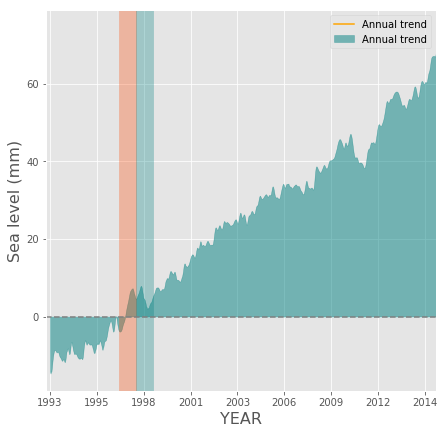

In [33]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.fill_between(range(len(sea_level.level)),0, sea_level.level, 
                color='Teal', label='Annual trend', alpha=0.5)
ax.plot(sea_level.level, color='orange', label='Annual trend');
ax.legend(loc='best')
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('Sea level (mm)', fontsize=16)
ax.axhline(y=0, color='Gray', linestyle='--')
ax.set_xlim(-9, 825)
ax.set_xticks(range(0, 815, 100))
ax.set_xticklabels(sea_level.index[::100])
ax.axvspan(147, 183, color='OrangeRed', alpha=0.3)
ax.axvspan(184, 220, color='Teal', alpha=0.3);


In [35]:
land_ice = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv',
                      skiprows=10, names=['datedec', 'greenlandGt', 'antarticGt'], index_col=0) 

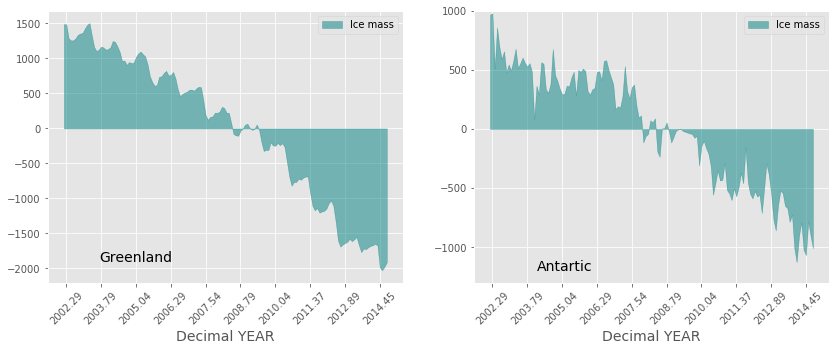

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
                                                    
ax1.fill_between(range(len(land_ice.greenlandGt)),0, land_ice.greenlandGt, 
                color='Teal', label='Ice mass', alpha=0.5)
#ax1.plot(land_ice.greenlandGt, color='orange', label='Ice mass')
ax1.legend(loc='best')
ax1.set_xlabel('Decimal YEAR', fontsize=14)
ax1.set_xticks(range(1, len(land_ice.greenlandGt), 15))
ax1.set_xticklabels(land_ice.index[::15], rotation=45)
ax1.annotate('Greenland', xy=(15, -1900), fontsize=14)
ax2.fill_between(range(len(land_ice.antarticGt)),0, land_ice.antarticGt, 
                color='Teal', label='Ice mass', alpha=0.5)
#ax2.plot(land_ice.antarticGt, color='orange', label='Ice Mass')
ax2.legend(loc='best');
ax2.set_xlabel('Decimal YEAR', fontsize=14)
ax2.set_ylim(-1300, 1000)
ax2.set_xticks(range(1, len(land_ice.greenlandGt), 15))
ax2.set_xticklabels(land_ice.index[::15], rotation=45)
ax2.annotate('Antartic', xy=(20, -1200), fontsize=14);